In [1]:
import obspy
import csv
from obspy import UTCDateTime
from obspy.clients.iris import Client
import matplotlib.pyplot as plt

In [2]:
client = Client()

# Define catalog duration
year1 = 2018
year2 = 2019

# Define stations provider
provider1 = "IRIS" 
provider2 = "GFZ"

catalog = f"./Events/Catalog_{year1}-{year2}"
with open(catalog, "r") as evtfiles:
    for i, file in enumerate(evtfiles):
        event = file.split()
        if (i == 1):   ### only check kth event
            origin_time = UTCDateTime(event[0])
            event_fname = "".join(event[0].split("T")[0].split("-")) + "".join("".join("".join(event[0].split("T")[1].split("Z")).split(".")).split(":"))
            lon = event[2]
            lat = event[1]
            print(origin_time,lon,lat)
            break

2018-11-28T10:17:09.090000Z 96.903 27.147


/home/elemento/anaconda3/envs/pygmt/lib/python3.9/site-packages/obspy/io/mseed/headers.py:823: InternalMSEEDWarning: CZ_JAVC__BHZ_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/elemento/anaconda3/envs/pygmt/lib/python3.9/site-packages/obspy/io/mseed/headers.py:823: InternalMSEEDWarning: CZ_KRUC__BHZ_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/elemento/anaconda3/envs/pygmt/lib/python3.9/site-packages/obspy/io/mseed/headers.py:823: InternalMSEEDWarning: CZ_VRAC__BHZ_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/elemento/anaconda3/envs/pygmt/lib/python3.9/site-packages/obspy/io/mseed/headers.py:823: InternalMSEEDWarning: M1_ANAC__EHZ_D: Warning: Number of blockettes in fixed header (1) does not match the number parse

<Figure size 1152x216 with 0 Axes>

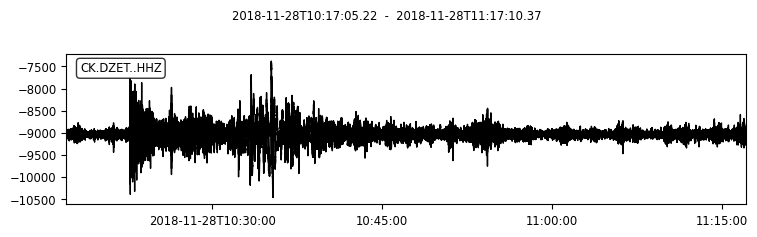

In [3]:
datadir = f"./Download/{provider2}/miniseed/{year1}/{event_fname}"

# Read in all vertical-component mseed files for one event
st = obspy.read(f"{datadir}/*Z.mseed")

num = 1  # View nth waveform
fig = plt.figure(figsize=(16, 3))
st[num].plot() 
plt.show()

In [4]:
# Analyzing a single event
print("Data for a single event:")
print(st)

# Number of traces
trace = st[0]
print(f"\nNumber of traces: {len(st)}")

# Extracting a single trace
print(f"\nExtracting a single trace:")
print(trace)

# Extracting the stats for a single trace
print(f"\nStats for a single trace:")
print(trace.stats)

Data for a single event:
170 Trace(s) in Stream:

4K.RUEG4..HHZ | 2018-11-28T10:17:06.600000Z - 2018-11-28T11:17:09.770000Z | 200.0 Hz, 720635 samples
...
(168 other traces)
...
WM.SFS..BHZ | 2018-11-28T10:16:56.445000Z - 2018-11-28T11:17:10.745000Z | 20.0 Hz, 72287 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

Number of traces: 170

Extracting a single trace:
4K.RUEG4..HHZ | 2018-11-28T10:17:06.600000Z - 2018-11-28T11:17:09.770000Z | 200.0 Hz, 720635 samples

Stats for a single trace:
         network: 4K
         station: RUEG4
        location: 
         channel: HHZ
       starttime: 2018-11-28T10:17:06.600000Z
         endtime: 2018-11-28T11:17:09.770000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 720635
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1427, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 5844992})


In [5]:
# Reading the Stations
station = f"./Stations/stations_{provider2}_{year1}-{year2}.txt"

# Here `sst` represents the individual traces
for sst in st:
    netwk = sst.stats.network
    stanm = sst.stats.station
    print(netwk, stanm)
    
    with open(station, "r") as stafiles:
        stafiles.readline()
        for i, file in enumerate(stafiles):
            sta = file.split("|")
            if netwk in sta and stanm in sta:
                stlo = sta[5]
                stla = sta[4]
                distaz = client.distaz(stla, stlo, lat, lon)
                distinm = distaz['distance'] * 111.19 * 1000
                sst.stats.distance = distinm
                print(distaz['distance'], distinm)
                break

4K RUEG4
64.52557 7174598.1283
CK DZET
26.19608 2912742.1351999994
CN FRB
88.53741 9844474.617899999
CN RES
77.99979 8672796.6501
CZ CKRC
65.39906 7271721.481400001
CZ DPC
63.78367 7092106.2672999995
CZ HSKC
65.52777 7286032.746300001
CZ JAVC
63.22497 7029984.4143
CZ KHC
65.79104 7315305.7376
CZ KRLC
63.51277 7061984.8963
CZ KRUC
64.00537 7116757.090299999
CZ NKC
66.22883 7363983.6077
CZ OKC
62.73604 6975620.287599999
CZ OSTC
63.80848 7094864.8911999995
CZ PRU
64.97904 7225019.457599999
CZ PVCC
64.84041 7209605.1879
CZ TREC
64.53617 7175776.742299999
CZ UPC
63.94556 7110106.8164
CZ VRAC
63.82642 7096859.6398
DK ANGG
81.06422 9013530.6218
DK BSD
63.70747 7083633.589299999
DK COP
64.98294 7225453.0986
DK DBG
70.8724 7880302.1559999995
DK DY2G
82.44883 9167485.4077
DK GOET
66.41572 7384763.906799999
DK ICESG
78.85355 8767726.2245
DK ILULI
81.00768 9007243.939199999
DK ISOG
81.4683 9058460.277
DK KULLO
77.00639 8562340.504099999
DK MUD
66.58485 7403569.4715
DK NOR
66.5551 7400261.568999999

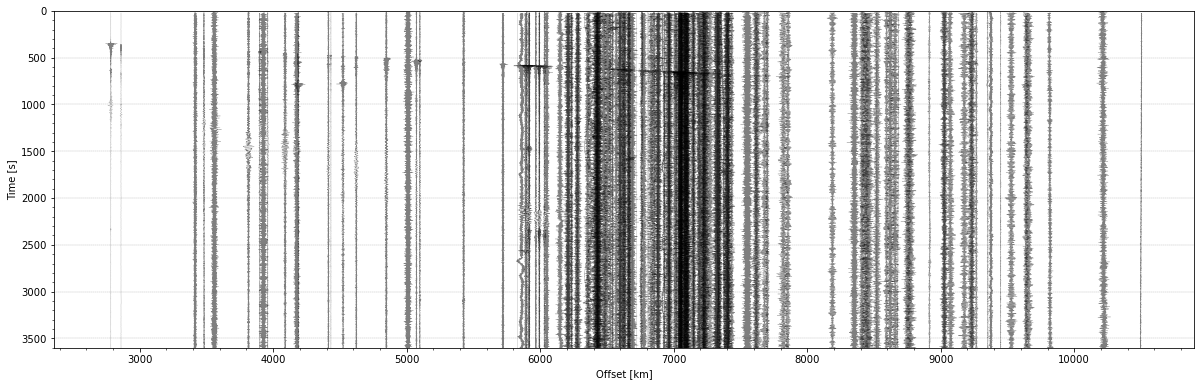

In [6]:
fig = plt.figure(figsize=(18, 6))
st.plot(type='section', recordlength=3600, time_down=True, linewidth=.25, 
    grid_linewidth=.25, show=False, fig=fig, scale=2.0)
plt.show()